In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os
from dataclasses import asdict
import random

In [2]:
if 'notebooks' in str(Path.cwd()):
    os.chdir(Path.cwd().parent)

from cats_and_dogs_hai.labels import cat_breed_names, dog_breed_names

In [3]:
repository_path = Path.cwd()
csv_path = repository_path / "data/cats_and_dogs/pets_dataset_info.csv"
data_path = repository_path / "data/cats_and_dogs/data/"
assert repository_path.is_dir(), 'Cannot find repository directory "%s"' % str(repository_path)
assert data_path.is_dir(), 'Cannot find repository directory "%s"' % str(repository_path)
assert csv_path.is_file(), 'Cannot find CSV file "%s"' % str(csv_path)

# Load csv
pets_db = pd.read_csv(csv_path)
pets_db.head()

,Sample_ID,Breed,PET_ID
0,e23e7fba-cdcf-59fc-b6e1-3dbae82c3f36,['samoyed'],[1]
1,bd3703af-9e60-5667-a6ca-e4f5a71e319b,['samoyed'],[2]
2,e1a0b2fa-5b34-565b-9f64-96704101804c,['keeshond'],[3]
3,dd9e09f2-8d78-5bcb-8873-d52c6ed83d1b,"['Persian', 'havanese']","[4, 5]"
4,a8d71823-ace8-5898-b017-209f9ef4cda9,['samoyed'],[6]


In [4]:
pets_db.shape

(9087, 3)

In [5]:
def display_datum(image_id:str, dataset_db:pd.DataFrame=pets_db, image_path:Path=data_path):
    image = plt.imread(image_path / image_id / 'image.jpg')
    mask = plt.imread(image_path / image_id / 'mask.jpg')
    breed:str = dataset_db.loc[dataset_db.Sample_ID == image_id].Breed.iloc[0]
    fig, axes_array = plt.subplots(1,3, figsize=(12, 6))
    fig.suptitle(f"Sample id {image_id}")
    for ax in axes_array:
        ax.grid(False)
        ax.axis("off")
    axes_array[0].imshow(image)
    axes_array[0].set_title(f"Input - {breed}")
    axes_array[1].imshow(mask, cmap='grey')
    axes_array[1].set_title("Pet Mask")
    axes_array[2].imshow(image)
    axes_array[2].imshow(mask, alpha=0.3)
    axes_array[2].set_title("Pets Mask Overlay")

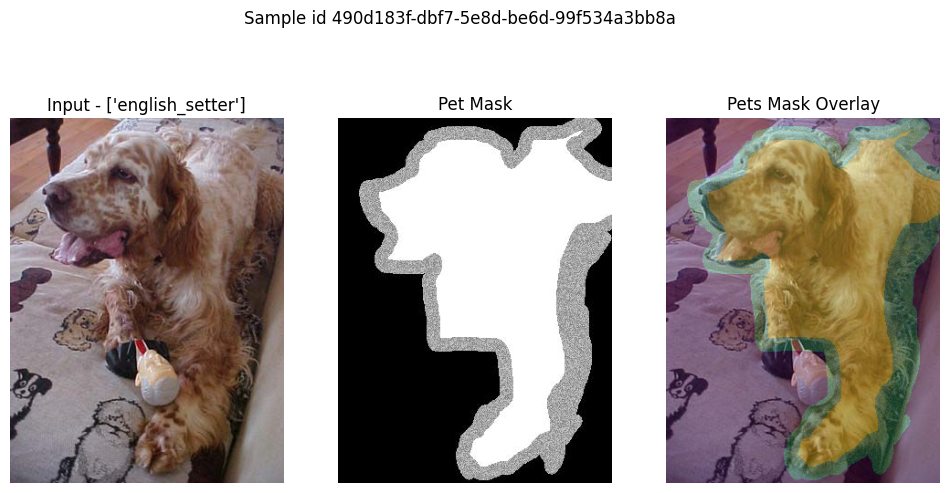

In [12]:
datum_id = pets_db.iloc[random.randint(0, pets_db.shape[0]-1)].Sample_ID
display_datum(datum_id)

In [7]:
datum_id = "dd9e09f2-8d78-5bcb-8873-d52c6ed83d1b"
breed:str = pets_db.loc[pets_db.Sample_ID == datum_id].Breed.iloc[0]
ast.literal_eval(breed)

['Persian', 'havanese']

In [8]:
number_images = pets_db.shape[0]
pets_db['Number_Of_Pets'] = pets_db.Breed.apply(lambda bn: len(ast.literal_eval(bn)))

all_breed_instances = []
for _, row in pets_db.iterrows():
    sample_id = row.Sample_ID
    for val in ast.literal_eval(row.Breed):
        all_breed_instances.append([sample_id, val])
all_breeds_df = pd.DataFrame(all_breed_instances, columns=['Sample_ID', 'Breed'])


def cat_or_dog_name(bn:str) -> str:
    if bn in cat_breed_names:
        name = 'Cat'
    elif bn in dog_breed_names:
        name = 'Dog'
    else:
        raise ValueError(f"Name '{bn}' should be cat or dog")
    return name
all_breeds_df['Species'] = all_breeds_df.Breed.apply(cat_or_dog_name)


<Axes: xlabel='Breed'>

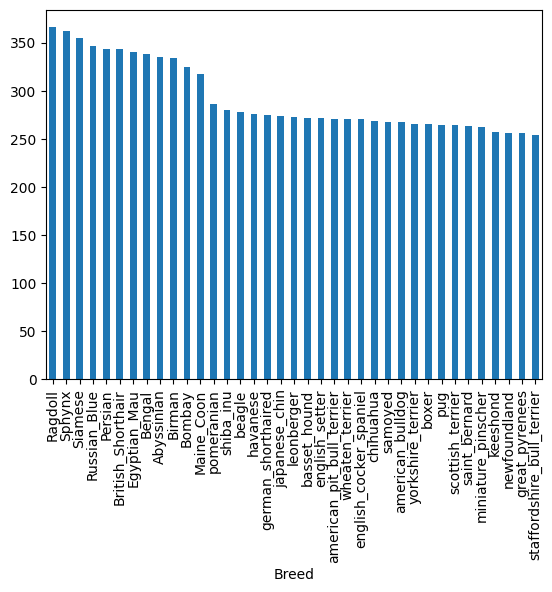

In [9]:
# Histogram of Pet breeds
all_breeds_df.Breed.value_counts().plot(kind='bar')

<Axes: xlabel='Species'>

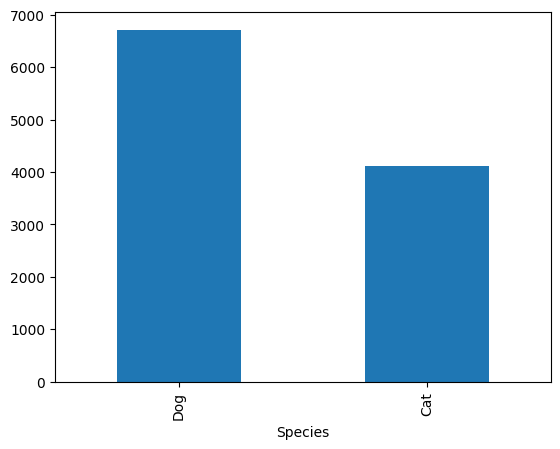

In [10]:
all_breeds_df.Species.value_counts().plot(kind='bar')

<Axes: xlabel='Number_Of_Pets'>

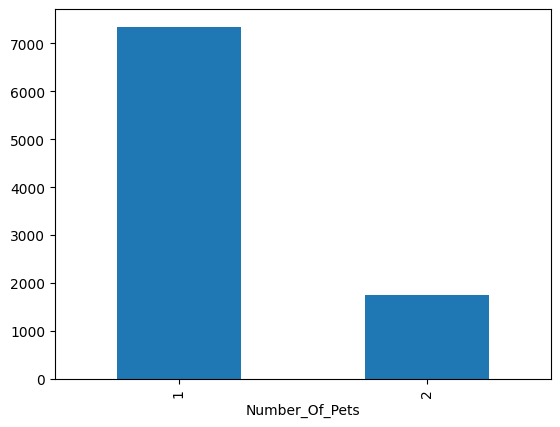

In [11]:
pets_db.Number_Of_Pets.value_counts().plot(kind='bar')